In [1]:
!pip install -U scikit-learn
import sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("/kaggle/input/ttswing-data/TTSWING.csv")

# Step 1: Drop irrelevant/non-numeric metadata
drop_cols = ['id', 'date', 'fileindex', 'count', 'age', 'play years', 'height', 'weight']
df_processed = df.drop(columns=drop_cols, errors='ignore')

# Step 2: Label Encode remaining categorical fields (like gender, handedness)
label_encoders = {}
for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Step 3: Select only motion/statistical features
motion_features = [col for col in df_processed.columns if col.startswith(('a_', 'g_', 'ax_', 'ay_', 'az_', 'gx_', 'gy_', 'gz_'))]
X_motion = df_processed[motion_features]

# Step 4: Standardize (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_motion)

# Optional: Convert back to DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=motion_features)

# Preview final processed data
X_scaled_df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 70.4 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_var,ay_var,az_var,gx_var,...,a_fft,g_fft,a_psdx,g_psdx,a_kurt,g_kurt,a_skewn,g_skewn,a_entropy,g_entropy
0,1.351754,-0.376035,-0.744045,-0.609490,0.044871,0.003479,-1.659810,-1.702728,-1.643119,-1.781548,...,6.088619,3.905517,21.463675,14.417266,-0.065684,-0.440164,-0.747104,-0.804218,1.415774,1.402594
1,0.879061,-0.571893,-0.653980,-1.188737,1.339224,1.071969,-0.502803,-0.759044,-0.070879,-1.407116,...,-0.613220,-0.695951,0.984854,0.507843,0.974665,-1.190543,-0.595356,-0.852981,1.385905,1.397255
2,-0.844522,-1.874587,0.964401,-0.573781,0.533720,0.344702,2.446573,1.439509,3.515503,-0.438341,...,-0.539420,-0.592677,0.291489,0.130647,-0.893104,-1.260997,-1.034148,-1.224430,1.466070,1.432499
3,-1.234633,-2.159769,1.659431,0.206225,0.606107,-0.208584,2.863225,1.983904,3.700098,-0.212263,...,-0.786386,-0.718547,0.036473,-0.049124,-0.921769,-1.129311,-1.123586,-1.238627,1.418017,1.444280
4,-1.484467,-2.200261,1.736175,0.341005,0.217498,0.063877,2.839163,1.952848,3.714768,-0.247836,...,-0.844546,-0.745983,-0.029830,-0.085476,-0.979831,-1.072102,-1.146676,-1.258883,1.385153,1.434327


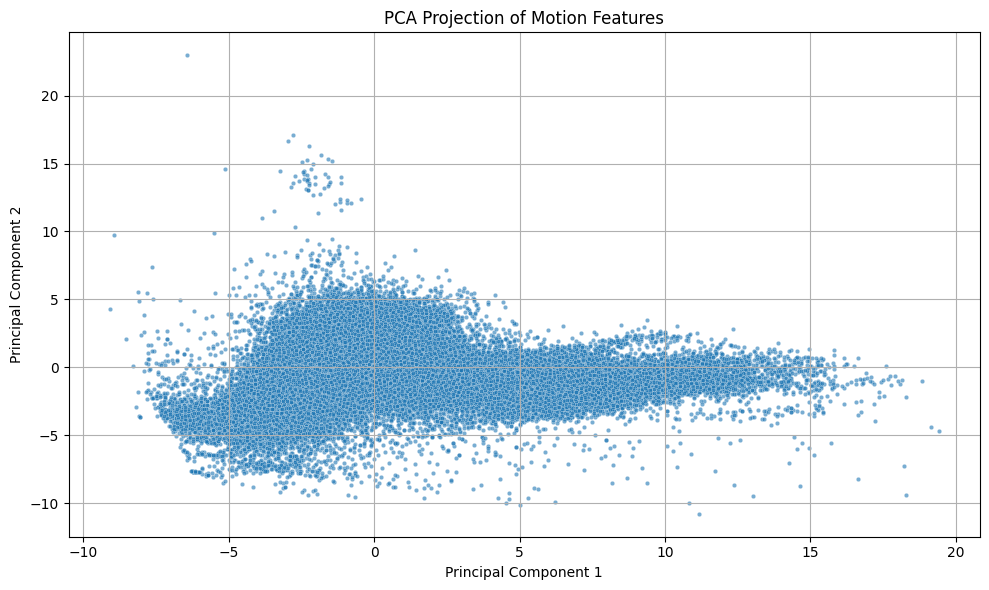

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=10, alpha=0.6)
plt.title("PCA Projection of Motion Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
X_pca

array([[-7.58739005e+00, -1.57526223e+00,  2.25584642e+01,
         4.69273089e+00, -1.47766340e+00],
       [-3.24222145e+00, -2.08615470e+00,  8.19897308e-01,
        -1.80298327e+00, -8.16837272e-01],
       [ 7.40491181e+00, -1.58809929e+00,  1.41168102e+00,
        -4.10115231e+00,  4.51659295e-03],
       ...,
       [ 2.37884989e+00, -2.12475514e+00, -1.23395813e+00,
         9.92140892e-01,  7.90793888e-01],
       [-2.71673348e+00, -2.77651961e+00, -1.68102773e+00,
         1.55127690e+00,  1.29817187e+00],
       [-4.46083146e+00, -2.75582932e+00, -1.39456183e+00,
         5.77192022e-01, -5.40126164e-02]])

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try clustering with K=3 (you can change this)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score (KMeans, k=3): {sil_score:.4f}")

Silhouette Score (KMeans, k=3): 0.2914


In [5]:
from sklearn.cluster import DBSCAN

# Try DBSCAN with tuned eps/min_samples (may require adjustment)
dbscan = DBSCAN(eps=2.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Check how many noise points and clusters
print("DBSCAN - Unique labels:", set(dbscan_labels))
print("DBSCAN - Number of clusters:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))

DBSCAN - Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, -1}
DBSCAN - Number of clusters: 129


In [6]:
import sklearn.cluster as hdbscan
# Run HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=50)
hdb_labels = hdb.fit_predict(X_scaled)

# Cluster summary
print("HDBSCAN - Unique labels:", set(hdb_labels))
print("HDBSCAN - Number of clusters:", len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0))

HDBSCAN - Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, -1}
HDBSCAN - Number of clusters: 30


/tmp/ipykernel_31/997223704.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


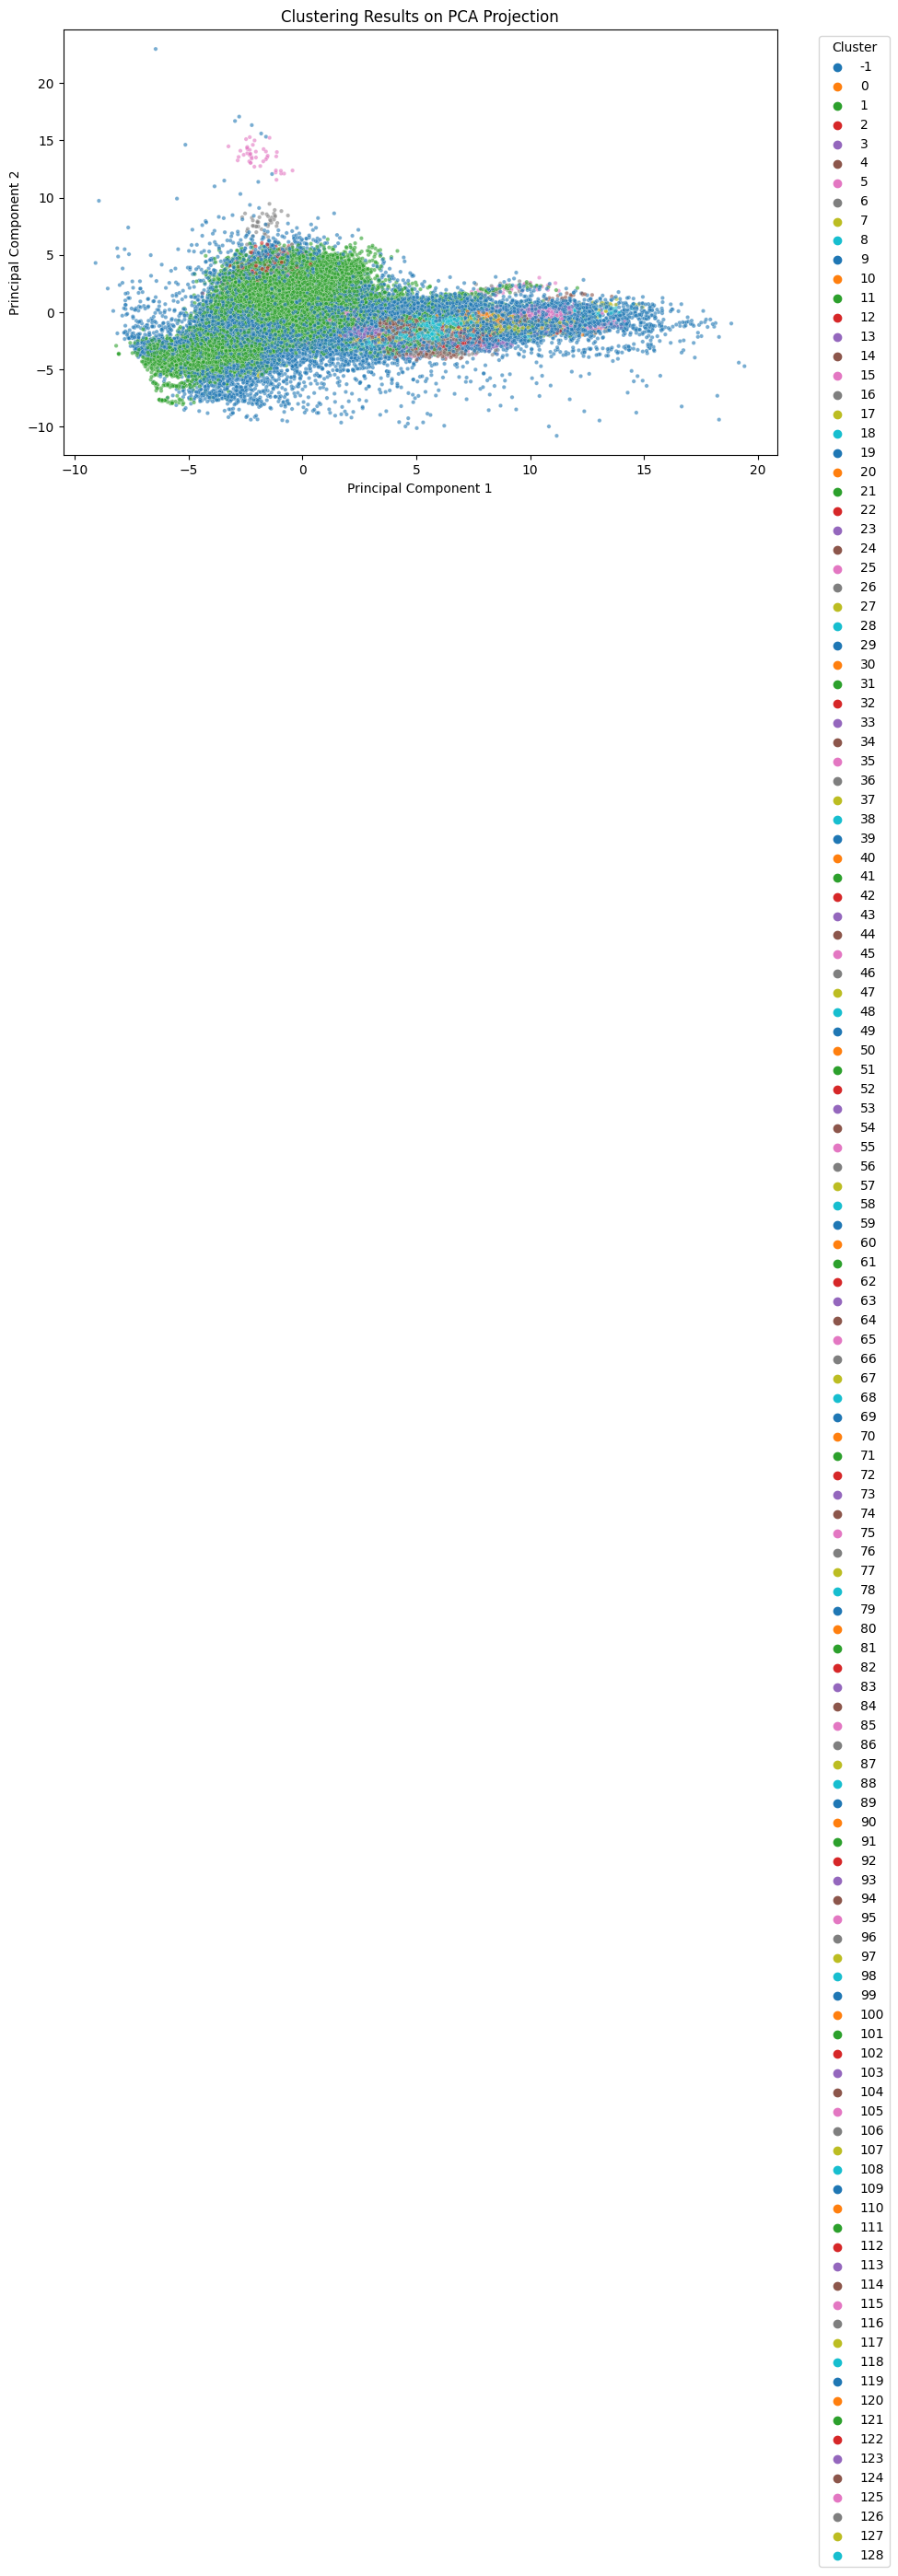

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10', s=10, alpha=0.6)
plt.title("Clustering Results on PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

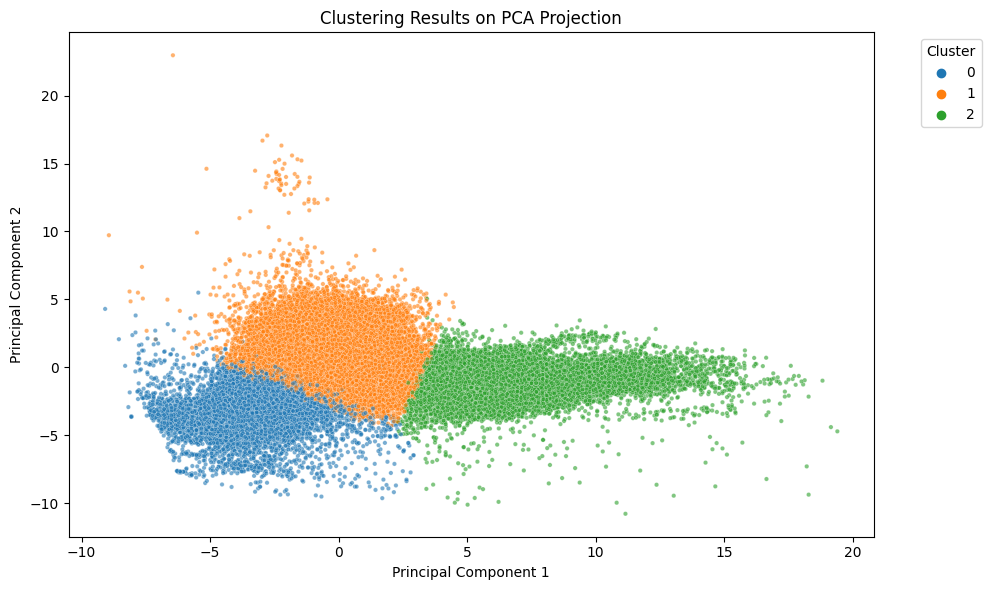

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', s=10, alpha=0.6)
plt.title("Clustering Results on PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

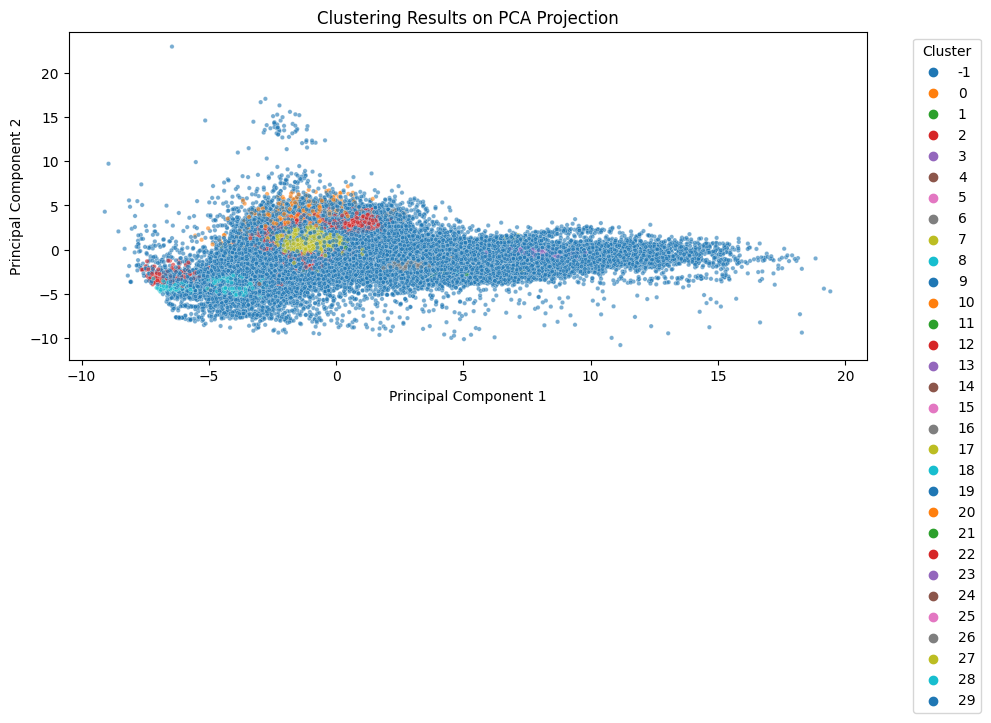

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hdb_labels, palette='tab10', s=10, alpha=0.6)
plt.title("Clustering Results on PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()